In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import os
from math import sqrt as sqrt
import numpy as np
import itertools
from torch.autograd import Function
import torch.nn.init as init
from ssd_project.model import ssd
from ssd_project.functions.detection import *
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
best_model = torch.load("../saved_models/first_best_model_ssd300.pth.tar")
model = ssd.build_ssd(num_classes = 4)
model.load_state_dict(best_model["model_state_dict"])
device = "cuda"
model = model.to(device)

In [3]:
epochs_trained = best_model["epoch"]
best_avg_loss = best_model["loss"]
t_loss_bvals = best_model["training_losses_batch_values"]
t_loss_bavgs = best_model["training_losses_batch_avgs"]
v_loss_bvals = best_model["validation_losses_batch_values"]
v_loss_bavgs = best_model["validation_losses_batch_avgs"]

In [4]:
best_avg_loss

2.559671573638916

In [5]:
imgs = glob.glob("/data/ssd_ilija_data/original_images/img_resized_*")
imgs.sort()

In [201]:
img, bboxes, labels, scores = predict_objects(model, imgs[128], min_score=0.1, max_overlap = 0.1, top_k=50)

/opt/conda/conda-bld/pytorch_1565272279342/work/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/opt/conda/conda-bld/pytorch_1565272279342/work/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/opt/conda/conda-bld/pytorch_1565272279342/work/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/opt/conda/conda-bld/pytorch_1565272279342/work/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/opt/conda/conda-bld/pytorch_1565272279342/work/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/opt/conda/conda-bld/pytorch_15652722793

In [202]:
annotated_img = draw_detected_objects(imgs[128], bboxes, labels, scores)

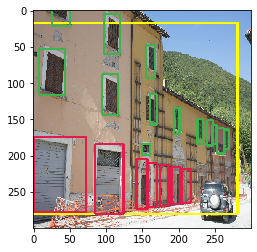

In [203]:
imgplot = plt.imshow(annotated_img)
plt.show()

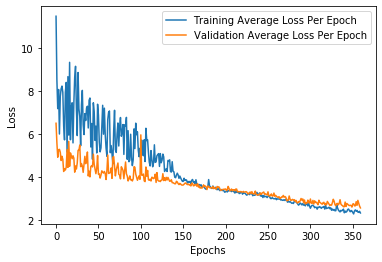

In [39]:
epochs_arr = list(range(epochs_trained+1))
plt.plot(epochs_arr, t_loss_bavgs, label = "Training Average Loss Per Epoch")
plt.plot(epochs_arr, v_loss_bavgs, label = "Validation Average Loss Per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


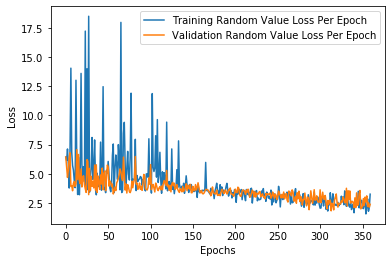

In [57]:
epochs_arr = list(range(epochs_trained+1))
plt.plot(epochs_arr, t_loss_bvals, label = "Training Random Value Loss Per Epoch")
plt.plot(epochs_arr, v_loss_bvals, label = "Validation Random Value Loss Per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()